In [30]:
import pandas as pd 
import numpy as np 
import statsmodels as st 
import sklearn 
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
train_df = pd.read_csv('../../data/feature/cb_train.csv')
val_df = pd.read_csv('../../data/feature/cb_validation.csv')
test_df = pd.read_csv('../../data/data/test.csv')

In [6]:
train_df.head()
print(train_df.info())

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Meal_Type,Visted_Previously,Previous_Cancellations,...,Booking_channel,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,booking_to_checkin,total_participants,Reservation_Status
0,0,40,0,0,0,0,0,0,0,0,...,0,0,0,218,7,2,1,41,4,0
1,0,49,0,1,1,1,0,0,0,0,...,0,0,1,185,7,2,1,36,6,0
2,0,42,1,0,0,1,0,0,0,0,...,0,0,1,119,7,3,4,3,6,0
3,1,25,2,2,2,2,1,0,0,0,...,1,0,0,144,7,3,1,12,7,0
4,0,62,0,3,3,1,2,0,0,0,...,2,1,0,242,7,4,1,13,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Gender                      27499 non-null  int64
 1   Age                         27499 non-null  int64
 2   Ethnicity                   27499 non-null  int64
 3   Educational_Level           27499 non-null  int64
 4   Income                      27499 non-null  int64
 5   Country_region              27499 non-null  int64
 6   Hotel_Type                  27499 non-null  int64
 7   Meal_Type                   27499 non-null  int64
 8   Visted_Previously           27499 non-null  int64
 9   Previous_Cancellations      27499 non-null  int64
 10  Deposit_type                27499 non-null  int64
 11  Booking_channel             27499 non-null  int64
 12  Required_Car_Parking        27499 non-null  int64
 13  Use_Promotion               27499 non-null  int64
 14  Room_R

In [10]:
pd.crosstab(train_df['Visted_Previously'],train_df['Previous_Cancellations'])

Previous_Cancellations,0,1
Visted_Previously,,
0,18344,0
1,6035,3120


In [12]:
val = train_df.iloc[12, [8,9]]

In [13]:
val[0],val[1]

(1, 0)

In [16]:
pr_cr_dict= {(0, 1) : 0, (1, 1): 1, (1, 0) : 2, (0, 0) : 3}
enc_df = train_df.apply(lambda rw: pr_cr_dict[(rw[8],rw[9])], axis=1)

In [17]:
nw5_df = train_df.drop(columns=['Visted_Previously','Previous_Cancellations'])
nw5_df['pr_vs_cn'] = enc_df

In [18]:
nw5_df.head()

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Meal_Type,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,booking_to_checkin,total_participants,Reservation_Status,pr_vs_cn
0,0,40,0,0,0,0,0,0,0,0,0,0,218,7,2,1,41,4,0,3
1,0,49,0,1,1,1,0,0,1,0,0,1,185,7,2,1,36,6,0,3
2,0,42,1,0,0,1,0,0,0,0,0,1,119,7,3,4,3,6,0,3
3,1,25,2,2,2,2,1,0,1,1,0,0,144,7,3,1,12,7,0,3
4,0,62,0,3,3,1,2,0,0,2,1,0,242,7,4,1,13,2,0,3


In [32]:
def cals_VIF(df):

    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

    return vif

In [33]:
cals_VIF(nw5_df)

,variables,VIF
0,Gender,1.968291
1,Age,8.218699
2,Ethnicity,2.746163
3,Educational_Level,3.387064
4,Income,2.441258
5,Country_region,3.283230
6,Hotel_Type,2.456530
7,Meal_Type,1.815896
8,Deposit_type,1.421551
9,Booking_channel,1.656201


In [19]:
def pca_perc_var_plot(df):
    df = df.copy()
    pca = PCA(n_components=df.shape[1])
    pca_data = pca.fit_transform(df)

    percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
    cumm_var_explained = np.cumsum(percent_var_explained)
    plt.plot(cumm_var_explained, 'bo-')
    plt.grid()
    plt.title("percentage of variation explained")
    plt.xlabel("n_components")
    plt.ylabel("% variance explained")
    plt.show()

def pca_scree_plot(df):
    df = df.copy()
    pca = PCA(n_components=df.shape[1])
    pca_data = pca.fit_transform(df)

    pcs = np.arange(pca.n_components_)+1
    plt.plot(pcs, pca.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance Explained')
    plt.show()

In [21]:
nw5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Gender                      27499 non-null  int64
 1   Age                         27499 non-null  int64
 2   Ethnicity                   27499 non-null  int64
 3   Educational_Level           27499 non-null  int64
 4   Income                      27499 non-null  int64
 5   Country_region              27499 non-null  int64
 6   Hotel_Type                  27499 non-null  int64
 7   Meal_Type                   27499 non-null  int64
 8   Deposit_type                27499 non-null  int64
 9   Booking_channel             27499 non-null  int64
 10  Required_Car_Parking        27499 non-null  int64
 11  Use_Promotion               27499 non-null  int64
 12  Room_Rate                   27499 non-null  int64
 13  month_Expected_checkin      27499 non-null  int64
 14  dayofw

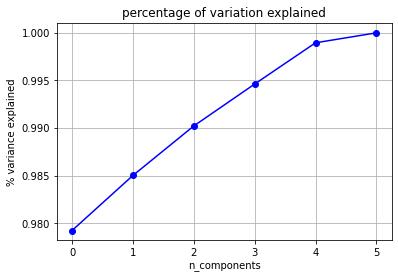

In [22]:
pca_perc_var_plot(nw5_df.iloc[:, [0,1,2,3,4,5]])

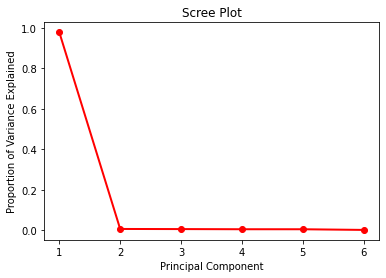

In [23]:
pca_scree_plot(nw5_df.iloc[:, [0,1,2,3,4,5]])

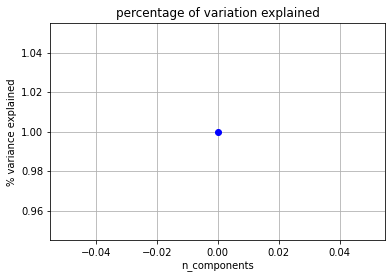

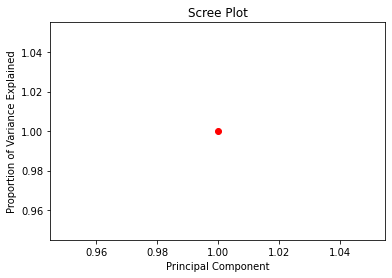

In [27]:
pca_df = PCA(n_components=1)
pca_data = pca.fit_transform(nw5_df.iloc[:, [0,1,2,3,4,5]])
pca_perc_var_plot(pca_data)
pca_scree_plot(pca_data)

In [28]:
pca_data

array([[-3.97579575],
       [ 5.02342737],
       [-1.97651561],
       ...,
       [ 5.02278506],
       [21.0217984 ],
       [ 4.02280468]])

In [36]:
nw6_df = nw5_df.drop(columns=['Gender', 'Age', 'Ethnicity', 'Educational_Level', 'Income',
       'Country_region'])
nw6_df['pers_pca'] = pca_data

In [37]:
cals_VIF(nw6_df)

,variables,VIF
0,Hotel_Type,2.438023
1,Meal_Type,1.809975
2,Deposit_type,1.418312
3,Booking_channel,1.651602
4,Required_Car_Parking,1.388411
5,Use_Promotion,1.321239
6,Room_Rate,11.875109
7,month_Expected_checkin,4.262465
8,dayofweek_Expected_checkin,2.941404
9,stay,4.177271


In [38]:
nw7_df = nw6_df.drop(columns=['pr_vs_cn'])

In [39]:
cals_VIF(nw7_df)

,variables,VIF
0,Hotel_Type,2.411444
1,Meal_Type,1.804919
2,Deposit_type,1.414395
3,Booking_channel,1.644640
4,Required_Car_Parking,1.384996
5,Use_Promotion,1.318683
6,Room_Rate,10.287385
7,month_Expected_checkin,4.143938
8,dayofweek_Expected_checkin,2.907266
9,stay,4.081061


In [40]:
nw8_df = nw6_df.drop(columns=['Room_Rate'])

In [41]:
cals_VIF(nw8_df)

,variables,VIF
0,Hotel_Type,2.413592
1,Meal_Type,1.801651
2,Deposit_type,1.414011
3,Booking_channel,1.645409
4,Required_Car_Parking,1.385114
5,Use_Promotion,1.317724
6,month_Expected_checkin,4.128004
7,dayofweek_Expected_checkin,2.898349
8,stay,4.070245
9,booking_to_checkin,2.820907


In [56]:
def value_to_color(n_colors, palette, color_min, color_max,val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def hinton_plot(data, columns=[], corr_func='pearson'):
    if columns == []:
        corr = data.corr(method=corr_func)
    else:
        data = data.loc[:,columns]
        corr = data.corr(method=corr_func)

    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x','y','value']

    x = corr['x']
    y = corr['y']
    size = corr['value']

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1)
    ax = plt.subplot(plot_grid[:,:-1])

    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}

    size_scale = 500
    n_colors = 256
    palette = sns.diverging_palette(20, 220, n=n_colors) 
    color_min, color_max = [-1, 1]

    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size*size_scale,
        c=size.apply(lambda x: value_to_color(n_colors, palette, color_min, color_max, x)),
        marker='s'
    )

    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.set_title("hintonmap for multi-colinearity between features")

    ax = plt.subplot(plot_grid[:,-1])

    col_x = [0]*len(palette)
    bar_y = np.linspace(color_min, color_max, n_colors)
    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )

    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right()

ipykernel_launcher:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
f:\JetBrain Project Files\Pycharm\datastorm-2021\venv\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


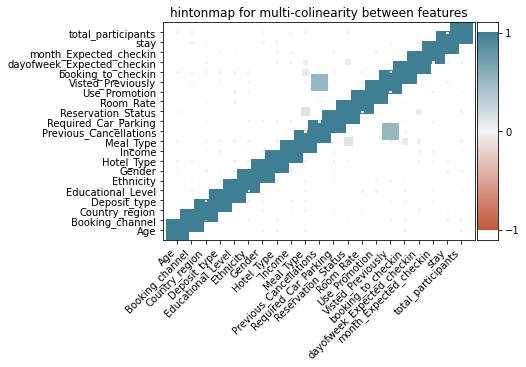

In [57]:
hinton_plot(train_df, train_df.columns.values)

ipykernel_launcher:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
f:\JetBrain Project Files\Pycharm\datastorm-2021\venv\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


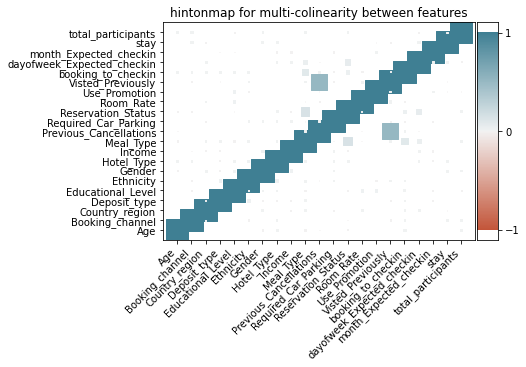

In [58]:
hinton_plot(train_df, train_df.columns.values,'spearman')

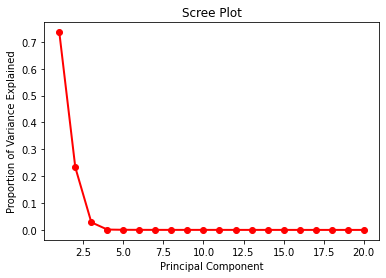

In [47]:
pca_scree_plot(train_df.iloc[:, :-1])

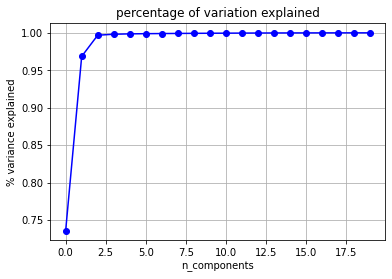

In [48]:
pca_perc_var_plot(train_df.iloc[:, :-1])

In [49]:
def corr_wt_target(df, target, columns):
    absCorr = []
    for col in columns:
        absCorr.append(abs(df[target].corr(df[col])))

    ax = sns.lineplot(columns,absCorr)
    ax.set_xticklabels(df.columns,rotation=45, horizontalalignment='right')
    ax.set_title("Absolute correlation of features with the target")

In [51]:
cols = train_df.columns[:-1]

f:\JetBrain Project Files\Pycharm\datastorm-2021\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
ipykernel_launcher:7: UserWarning: FixedFormatter should only be used together with FixedLocator


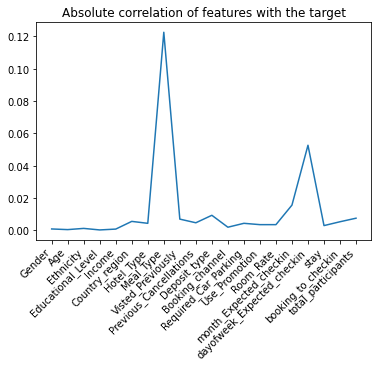

In [52]:
corr_wt_target(train_df,'Reservation_Status', cols)

In [53]:
cals_VIF(train_df)

,variables,VIF
0,Gender,1.961509
1,Age,7.982258
2,Ethnicity,2.731756
3,Educational_Level,3.357354
4,Income,2.428431
5,Country_region,3.253738
6,Hotel_Type,2.442342
7,Meal_Type,1.813988
8,Visted_Previously,2.006487
9,Previous_Cancellations,1.517672


In [1]:
tol_pca = PCA(n_components=6)
tol_pca_df = tol_pca.fit_transform(train_df)
pca_perc_var_plot(tol_pca_df)
pca_scree_plot(tol_pca_df)

NameError: name 'PCA' is not defined